<a href="https://colab.research.google.com/github/wlwaters/Deep-Learning/blob/main/Perceptron1v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y  shape: (1, 50)
sigmoid(0) =0.5
sigmoid(9.2) = 0.9998989708060922
Loss after iteration 0: 0.297788


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in exp


Loss after iteration 100: 0.172249
Loss after iteration 200: 0.172249
Loss after iteration 300: 0.172249
Loss after iteration 400: 0.172249
Loss after iteration 500: 0.172249
Loss after iteration 600: 0.172249
Loss after iteration 700: 0.172249
Loss after iteration 800: 0.172249
Loss after iteration 900: 0.172249
Loss after iteration 1000: 0.172249
Loss after iteration 1100: 0.172249
Loss after iteration 1200: 0.172249
Loss after iteration 1300: 0.172249
Loss after iteration 1400: 0.172249
Loss after iteration 1500: 0.172249
Loss after iteration 1600: 0.172249
Loss after iteration 1700: 0.172249
Loss after iteration 1800: 0.172249
Loss after iteration 1900: 0.172249
train accuracy: 65.55023923444976 %
test accuracy: 34.0 %


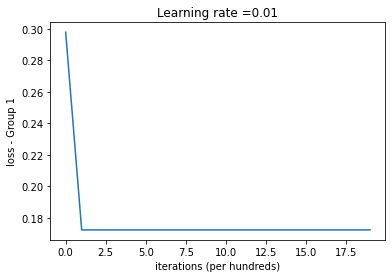

In [ ]:
#
#      EE 6183-Y01 Deep Learning  Homework #1  Group 1 Activation and Loss
#       Import packages
import h5py
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
#
# load_datasets
#
train_dataset = h5py.File('train_catvnoncat.h5',"r")
train_set_x_orig=np.array(train_dataset["train_set_x"][:])
train_set_y =np.array(train_dataset["train_set_y"][:])
test_dataset = h5py.File('test_catvnoncat.h5',"r")
test_set_x_orig=np.array(test_dataset["test_set_x"][:])
test_set_y =np.array(test_dataset["test_set_y"][:])

classes=np.array(test_dataset["list_classes"][:])

train_set_y =train_set_y.reshape((1, train_set_y.shape[0]))
test_set_y =test_set_y.reshape((1, test_set_y.shape[0]))
# 
# 
# Display dataset to check accessibility
# 

#index = 25

#plt.imshow(train_set_x_orig[index])
#print ("y =" + str(train_set_y[:,index]) + ", it's a ' " + 
#classes [np.squeeze(train_set_y[:,index])].decode("utf-8") + "'picture.")


m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]


# We must reshape the training and test datasets into single vectors for input 

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],
-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], 
-1).T
print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print("test_set_y  shape: " + str(test_set_y.shape))

# Normalize the data by divide each row of data set by 255

train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255
#X = train_set_x
#Y = train_set_y
#X_Test = test_set_x
# ---------------------------------------------------------------------------
def sigmoid(z):
  """
   Compute the sigmoid of z
   Arguments: x -- A scalar od numpy array of any size
   Return:
   S -- sigmoid(z)
   """
  s = 1 / (1 + np.exp(-z))
  return s


print("sigmoid(0) =" + str(sigmoid(0)))
print("sigmoid(9.2) = " + str(sigmoid(9.2)))
# -------------------------------------------------------------------------
# dim -- size of the w vector we want
# w -- initialized vector of shape (dim, 1)
# b -- initialized scalar (corresponds to the bias)
# Function creates a vector of zeroes of shape (dim, 1) for w and set b to 1
# -------------------------------------------------------------------------
def initialize_with_zeros(dim):
  w = np.zeros(shape=(dim,1))
  b = 1
  return w,b
# --------------------------------------------------------------------------
# dim = 2
# w, b = initialize_with_zeros(dim)
# print("w = " + str(w))
# print("b = " + str(b))

def propagate(w,b,X,Y):
  # Implement the loss function and its gradient for the forward and 
  # backward propagation
  m = X.shape[1]
  train_set_x=np.array(X)*5
  # FORWARD PROPAGATION (GROUP 1)
  # Activation function for Group 1 based on given function
  # ---------------------------------------------------------
  A = sigmoid(np.dot(w.T,train_set_x) + (3*b))
  loss = (1.0/(2*m)) * np.sum((Y-A)*(Y-A))
  # ---------------------------------------------------------
  # BACKWARD PROPAGATION (TO FIND GRADS)
  Z1 = np.dot(A, (1-A).T)
  Z2 = np.dot(X, (Y-A).T)
  dw = (-1.0 / m) * (Z1*Z2)
  db = (-1.0 / m) * np.sum(Z1*(Y-A))
  assert(dw.shape == w.shape)
  assert(db.dtype == float)
  loss = np.squeeze(loss)
  assert(loss.shape == ())

  grads = {"dw": dw, "db": db}

  return grads, loss
#
# -------------------------------------------------------------------------
#  OPTIMIZE USING GRADIENT DESCENT
# -------------------------------------------------------------------------

                                                                             
                                                                             
def optimize(w, b, X, Y, num_iterations, learning_rate, print_loss = False):
  # This function optimizes w and b by running a gradient_descent algorithm
  # w -- weights, a nump array of size (num_px * num_px *)
  # b -- bias. a scalar
  # X -- data of shape (num_px * num_px * 3, number of examples)
  # Y -- true "label" vector (0 if non-cat, 1 if cat)
  # num_iterations 
  # learning_rate -- learning rate of the gradient descent update rule
  # print_loss -- True means to print the loss every 100 steps
  #
  # Returns
  # params -- dictionary containing the weiths w and bias b 
  # grads -- dictionary containing the gradients of the weights and bias with
  #          respect to the loss function
  # Loss -- List of all the loss computed during the optimization, this will
  #         be used to plot the learning curve
  losses = []

  for i in range(num_iterations):
    # Loss and gradient calculation (~ 1-4 lines of code)
    grads, loss = propagate(w, b, X, Y)
    # Retrieve derivatives from grads
    dw = grads["dw"]
    db = grads["db"]
    # update rule (~ 2 lines of code)
    w = w - learning_rate * dw 
    b = b -learning_rate * db
    # Record the losses
    if i % 100 == 0:
      losses.append(loss)
    # Print the loss every 100 training examples
    if print_loss and i % 100 == 0:
      print("Loss after iteration %i: %f" % (i, loss))
  params = {"w":w, "b": b}
  grads = {"dw": dw, "db": db}

  return params, grads, losses
#
#
# Predict --------------------------------------------------------------------
#
def predict(w, b, X):
  # Predict whether the label is 0 or 1 using learned Logistics 
  # regression parameters (w,b)
  # 
  # Returns: 
  #    Y_prediction -- a numpy array (vector) containing all predictiions
  #                    (0/1) for the examples in X
  #
  m = X.shape[1]
  Y_prediction = np.zeros((1,m))
  w = w.reshape(X.shape[0],1)
  # Compute vector "A" predicting the probabilities of a cat being present
  # in the picture 
  #
  A = sigmoid(np.dot(w.T,X) + b)
  for i in range(A.shape[1]):
    # Convert probabilities a [0,i] to actual predictions p[0,1]
    Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    assert(Y_prediction.shape == (1,m))

    return Y_prediction

### -------------------------------------------------------------------------

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate =
.01, print_loss=False):
#
# initialize parameters with zeros ()
#
    w, b = initialize_with_zeros(X_train.shape[0])
# Gradient descent 
    params, grads, losses = optimize(w,b, X_train, Y_train,num_iterations,
    learning_rate, print_loss)
    w = params["w"]
    b = params["b"]
# Predict test/test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
#
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train
    - Y_train)) * 100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_test
    - Y_test )) * 100))

    d = {"losses": losses,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d
# --------------------------------------------------------------------------
# Run the model 
# --------------------------------------------------------------------------
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 
          2000, learning_rate=.01, print_loss = True)
# --------------------------------------------------------------------------
# Plot the Results
losses = np.squeeze(d['losses'])
plt.plot(losses)
plt.ylabel('loss - Group 1')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()


    






# New Section